In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_uniform_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform/model-400000


2019-01-22 13:50:59,986:INFO:Restoring parameters from experiments/additive_1x2_uniform/model-400000
2019-01-22 13:51:03,635:INFO:TEST BATCH-0: t = 3.6128, Revenue: 0.215435, Regret: 0.000000, IRP: 0.000000, Welfare: 0.258669
2019-01-22 13:51:03,644:INFO:TEST BATCH-1: t = 3.6175, Revenue: 0.214876, Regret: 0.000000, IRP: 0.000000, Welfare: 0.258171
2019-01-22 13:51:03,652:INFO:TEST BATCH-2: t = 3.6221, Revenue: 0.214684, Regret: 0.000005, IRP: 0.000000, Welfare: 0.258078
2019-01-22 13:51:03,659:INFO:TEST BATCH-3: t = 3.6265, Revenue: 0.214749, Regret: 0.000000, IRP: 0.000000, Welfare: 0.258281
2019-01-22 13:51:03,667:INFO:TEST BATCH-4: t = 3.6306, Revenue: 0.215004, Regret: 0.000000, IRP: 0.000000, Welfare: 0.258710
2019-01-22 13:51:03,674:INFO:TEST BATCH-5: t = 3.6347, Revenue: 0.215419, Regret: 0.000000, IRP: 0.000000, Welfare: 0.259335
2019-01-22 13:51:03,681:INFO:TEST BATCH-6: t = 3.6387, Revenue: 0.215987, Regret: 0.000000, IRP: 0.000000, Welfare: 0.260144
2019-01-22 13:51:03,688:

2019-01-22 13:51:04,118:INFO:TEST BATCH-65: t = 3.9063, Revenue: 0.407625, Regret: 0.000004, IRP: 0.000000, Welfare: 0.518745
2019-01-22 13:51:04,126:INFO:TEST BATCH-66: t = 3.9109, Revenue: 0.412364, Regret: 0.000000, IRP: 0.000000, Welfare: 0.525662
2019-01-22 13:51:04,133:INFO:TEST BATCH-67: t = 3.9153, Revenue: 0.417090, Regret: 0.000004, IRP: 0.000000, Welfare: 0.532597
2019-01-22 13:51:04,140:INFO:TEST BATCH-68: t = 3.9196, Revenue: 0.421801, Regret: 0.000000, IRP: 0.000000, Welfare: 0.539549
2019-01-22 13:51:04,147:INFO:TEST BATCH-69: t = 3.9240, Revenue: 0.426495, Regret: 0.000000, IRP: 0.000000, Welfare: 0.546516
2019-01-22 13:51:04,154:INFO:TEST BATCH-70: t = 3.9284, Revenue: 0.431172, Regret: 0.000007, IRP: 0.000000, Welfare: 0.553496
2019-01-22 13:51:04,162:INFO:TEST BATCH-71: t = 3.9328, Revenue: 0.435833, Regret: 0.000001, IRP: 0.000000, Welfare: 0.560489
2019-01-22 13:51:04,170:INFO:TEST BATCH-72: t = 3.9380, Revenue: 0.440475, Regret: 0.000014, IRP: 0.000000, Welfare: 0

2019-01-22 13:51:04,495:INFO:TEST BATCH-130: t = 4.1516, Revenue: 0.713600, Regret: 0.000002, IRP: 0.000000, Welfare: 1.026444
2019-01-22 13:51:04,500:INFO:TEST BATCH-131: t = 4.1549, Revenue: 0.719436, Regret: 0.000000, IRP: 0.000000, Welfare: 1.036422
2019-01-22 13:51:04,505:INFO:TEST BATCH-132: t = 4.1583, Revenue: 0.725320, Regret: 0.000001, IRP: 0.000000, Welfare: 1.046489
2019-01-22 13:51:04,510:INFO:TEST BATCH-133: t = 4.1617, Revenue: 0.731235, Regret: 0.000000, IRP: 0.000000, Welfare: 1.056632
2019-01-22 13:51:04,516:INFO:TEST BATCH-134: t = 4.1659, Revenue: 0.737163, Regret: 0.000005, IRP: 0.000000, Welfare: 1.066831
2019-01-22 13:51:04,521:INFO:TEST BATCH-135: t = 4.1694, Revenue: 0.743079, Regret: 0.000000, IRP: 0.000000, Welfare: 1.077063
2019-01-22 13:51:04,525:INFO:TEST BATCH-136: t = 4.1729, Revenue: 0.748956, Regret: 0.000000, IRP: 0.000000, Welfare: 1.087301
2019-01-22 13:51:04,530:INFO:TEST BATCH-137: t = 4.1762, Revenue: 0.754761, Regret: 0.000000, IRP: 0.000000, We

2019-01-22 13:51:04,824:INFO:TEST BATCH-195: t = 4.3908, Revenue: 0.830325, Regret: 0.000000, IRP: 0.000000, Welfare: 1.456875
2019-01-22 13:51:04,828:INFO:TEST BATCH-196: t = 4.3943, Revenue: 0.830407, Regret: 0.000000, IRP: 0.000000, Welfare: 1.461945
2019-01-22 13:51:04,834:INFO:TEST BATCH-197: t = 4.3980, Revenue: 0.830485, Regret: 0.000000, IRP: 0.000000, Welfare: 1.467010
2019-01-22 13:51:04,839:INFO:TEST BATCH-198: t = 4.4020, Revenue: 0.830559, Regret: 0.000001, IRP: 0.000000, Welfare: 1.472070
2019-01-22 13:51:04,844:INFO:TEST BATCH-199: t = 4.4056, Revenue: 0.830630, Regret: 0.000002, IRP: 0.000000, Welfare: 1.477126
2019-01-22 13:51:04,848:INFO:TEST BATCH-200: t = 4.4090, Revenue: 0.830698, Regret: 0.000001, IRP: 0.000000, Welfare: 1.482178
2019-01-22 13:51:04,850:INFO:TEST ALL-400000: t = 4.4090, Revenue: 0.555808, Regret: 0.000002, IRP: 0.000000, Welfare: 0.810688


DEBUG: xsum = 40401.000000


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

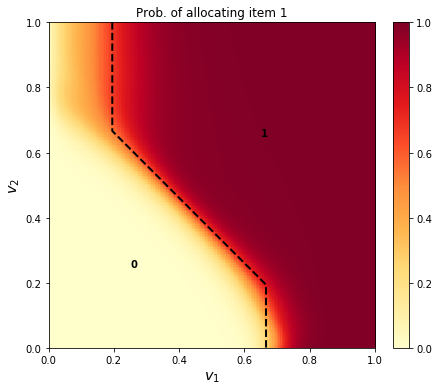

In [6]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(x1, 1.0), (x1, x2), (x2, x1), (x2, 0)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

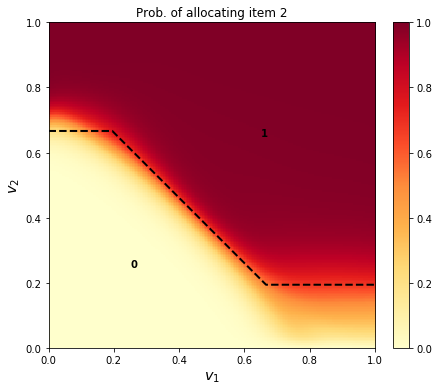

In [7]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(0.0, x2), (x1, x2), (x2, x1), (1.0, x1)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

In [8]:
img